In [1]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import sys
import string
from wordcloud import WordCloud, STOPWORDS

In [3]:
processed_tweets = pd.read_csv('../data/processed_tweet_data.csv')
processed_tweets.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Wed Aug 03 20:19:13 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,0.300000,0.203571,en,0,0,DzCritical,318,373,NaN,"['Pelosi', 'Taiwan', 'NATO', '5G']",Flightradar24,Algérie
1,Tue Aug 02 15:24:42 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Watch the video of the beginning of the Chines...,0.000000,0.000000,en,3,0,toopsat,764,144,False,"['Pelosi', 'マツコの知らない世界', 'Yediiklim', 'BadDeci...",Reno Omokri,NaN
2,Tue Aug 02 15:02:35 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,0.000000,0.000000,en,2,0,NassimaLilEmy,64,47,False,"['Pelosi', 'Taipei', 'taiwan', 'XiJinping', 'C...",Peter Obi,Algérie
3,Mon Aug 01 13:51:42 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,0.433333,0.733333,en,0,0,d_dhayae,60,463,False,"['HOBIPALOOZA', 'LaAcademiaExpulsion', 'WEURO2...",BBC News (World),Chlef
4,Sun Jul 31 20:02:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,0.000000,0.000000,en,2,0,Mohamme65404115,39,206,False,"['Pelosi', 'china']",Nancy Pelosi,Algérie


### Data Exploration checkpoints <br>
- Check what the columns are and their types
- Check if there exists any missing value


In [4]:
# View the list of columns

list(processed_tweets.columns) 

['created_at',
 'source',
 'original_text',
 'polarity',
 'subjectivity',
 'lang',
 'favorite_count',
 'retweet_count',
 'original_author',
 'followers_count',
 'friends_count',
 'possibly_sensitive',
 'hashtags',
 'user_mentions',
 'place']

In [5]:
# Find out details about each column
processed_tweets.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19011 entries, 0 to 19010
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          19011 non-null  object 
 1   source              19011 non-null  object 
 2   original_text       19011 non-null  object 
 3   polarity            19011 non-null  float64
 4   subjectivity        19011 non-null  float64
 5   lang                19011 non-null  object 
 6   favorite_count      19011 non-null  int64  
 7   retweet_count       19011 non-null  int64  
 8   original_author     19011 non-null  object 
 9   followers_count     19011 non-null  int64  
 10  friends_count       19011 non-null  int64  
 11  possibly_sensitive  14869 non-null  object 
 12  hashtags            19011 non-null  object 
 13  user_mentions       19011 non-null  object 
 14  place               18658 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 2.2+

In [6]:

print("Number of missing value(s) of each column:\n\n{}".format(processed_tweets.isnull().sum()))

Number of missing value(s) of each column:

created_at               0
source                   0
original_text            0
polarity                 0
subjectivity             0
lang                     0
favorite_count           0
retweet_count            0
original_author          0
followers_count          0
friends_count            0
possibly_sensitive    4142
hashtags                 0
user_mentions            0
place                  353
dtype: int64


In [7]:
print("Number of missing value(s) - {}".format(processed_tweets.isnull().sum().sum()))

Number of missing value(s) - 4495


In [8]:
print("Columns with missing value(s):{}".format(list(processed_tweets.columns[processed_tweets.isnull().any()])))

Columns with missing value(s):['possibly_sensitive', 'place']


### Missing Values Visualization

<AxesSubplot:>

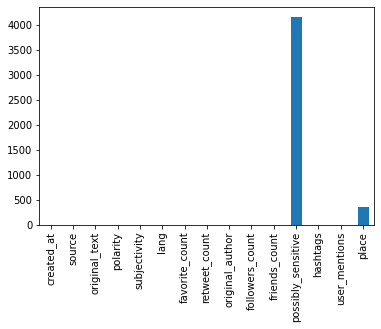

In [9]:
missing_values_count = processed_tweets.isnull().sum()
missing_values_count.plot(kind='bar')